<a href="https://colab.research.google.com/github/Julimarc07/Biose-ales_Juliana_Mart-nez/blob/main/Pr%C3%A1ctica_3_1_Juliana_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3**


1. ***Implementación de funciones***

In [73]:
import numpy as np

def rms(vect):
    v = np.arange(0, len(vect))
    z = []
    for i in v:
        z.append(vect[i]**2)
    return np.sqrt(np.sum(z) / len(vect))

#Ejemplo
vect = [3,5,2]
resultado = rms(vect)
print(resultado)

3.559026084010437


2. ***Análisis estadístico de ECG***

In [ ]:

!pip install scipy matplotlib statsmodels numpy

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.stats import levene, ttest_ind, mannwhitneyu, shapiro
from statsmodels.tsa.stattools import adfuller
from google.colab import files
import io

In [ ]:
# Subir el archivo signals.mat
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Cargar los datos
data = sio.loadmat(io.BytesIO(uploaded[filename]))

# Mostrar las variables disponibles en el archivo
print("Variables en el archivo:")
for key in data.keys():
    if not key.startswith('__'):
        print(f"- {key}: {data[key].shape}")

Saving signals 1.mat to signals 1.mat
Variables en el archivo:
- Fs: (1, 1)
- ECG_asRecording: (1, 30720)
- ECG_filtered: (1, 30720)
- EMG_filtered1: (1, 30721)
- EMG_filtered2: (1, 30721)
- EMG_asRecording1: (1, 30721)
- EMG_asRecording2: (1, 30721)


In [ ]:
#Se confirma que ambos datasets tienen el mismo tamaño
asRecording = np.transpose(data['ECG_asRecording'])
filtered = np.transpose(data['ECG_filtered'])

***a) A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo***

In [ ]:

fs = data['Fs'][0,0]  # Fs está en data['Fs'] como una matriz 1x1
# Transponer y aplanar las señales
asRecording = np.transpose(data['ECG_asRecording']).flatten()
filtered = np.transpose(data['ECG_filtered']).flatten()
# Crear vector de tiempo
Tm = 1/fs
n_points = len(asRecording)
tiempo = np.arange(0, n_points * Tm, Tm)

b) ***Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.***

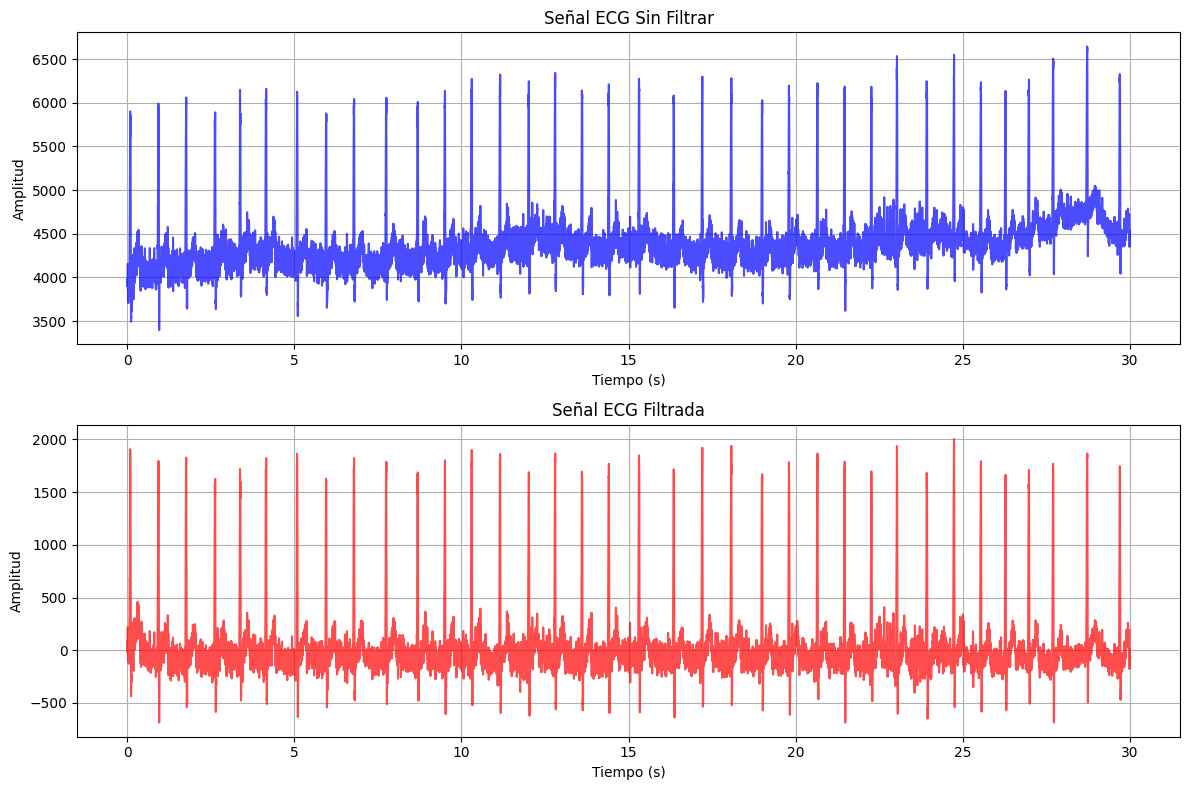

In [ ]:
# Graficar señales sin filtrar vs filtradas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(tiempo, asRecording, 'b-', alpha=0.7)
ax1.set_title('Señal ECG Sin Filtrar')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud')
ax1.grid(True)

ax2.plot(tiempo, filtered, 'r-', alpha=0.7)
ax2.set_title('Señal ECG Filtrada')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud')
ax2.grid(True)

plt.tight_layout()
plt.show()

Se observa que a la señal sin filtrar se le aplicó un offset y un detrending lineal, de modo que las fluctuaciones de la señal filtrada se concentran alrededor de la media cero, eliminando tendencias lineales. Asimismo, la reducción del ruido de alta frecuencia sugiere el uso de un filtro pasa bajas, que atenuó las componentes no deseadas y permitió resaltar las ondas características del ECG. Dado que las frecuencias de interés del ECG se encuentran entre 0.05 y 100 Hz, es probable que este filtrado se haya complementado con un filtro pasa altas para eliminar la deriva de la línea base y con un filtro pasa banda o notch en 50/60 Hz para suprimir la interferencia eléctrica, logrando así un trazado más limpio y clínicamente útil.

c) ***Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.***

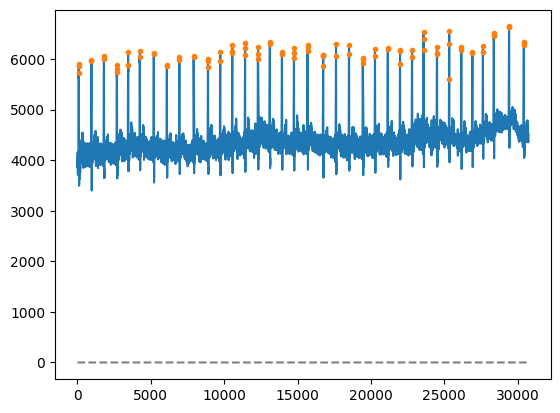

In [ ]:
from scipy.signal import find_peaks
x = asRecording.flatten() #Identificación de los picos de la señal normal
peaks, _ = find_peaks(x, height=5500) #Altura a partir de la cual se escogen los picos
plt.plot(x) #Graficación de la señal sin filtrar
plt.plot(peaks, x[peaks], ".") #Puntos para identificar los picos graficamente
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show() #Mostrar la ubicación de los picos en el eje x

Varianza:  93646.2220564969
RMS:  4142.454957820607
Promedio:  4131.136266878161
Desviación estándar:  306.01670225086883


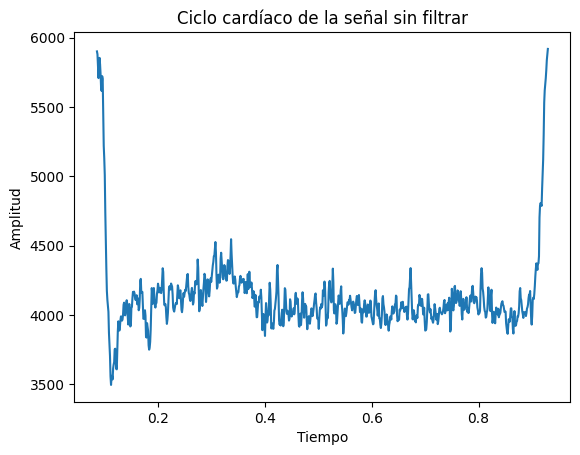

In [ ]:
#Escoger un ciclo de la señal basado en sus picos
pico1 = peaks[0]
pico2 = peaks[3]
ciclo = x[pico1:pico2] #Rango en amplitud
t_ciclo = tiempo[pico1:pico2] #Rango en tiempo

#Graficación
plt.plot(t_ciclo,ciclo)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Ciclo cardíaco de la señal sin filtrar")

#Cálculo de promedio, varianza, valor RMS y desviación estándar del ciclo
print("Varianza: ", np.var(ciclo))
print("RMS: ", rms(ciclo))
print("Promedio: ", np.mean(ciclo))
print("Desviación estándar: ", np.std(ciclo))

La varianza presenta un valor significativo (93646.222) con respecto a la media del ciclo de la señal (4131.13), lo que indica que los datos presentan una gran dispersión, esto causado por diferencia en amplitud de los datos. Además, la desviación me indica que los datos tienden a desviarse en 306.03 al compararlos con el promedio, lo que indica una gran variabilidad de los datos.

El RMS presenta un valor acorde a lo esperado según el promedio, lo que indica que la intensidad de la señal se ve represetada en valores cercacanos al promedio y no se desvía drásticamente de la media en términos de magnitud general, a pesar de la alta dispersión observada.

d) ***Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.***

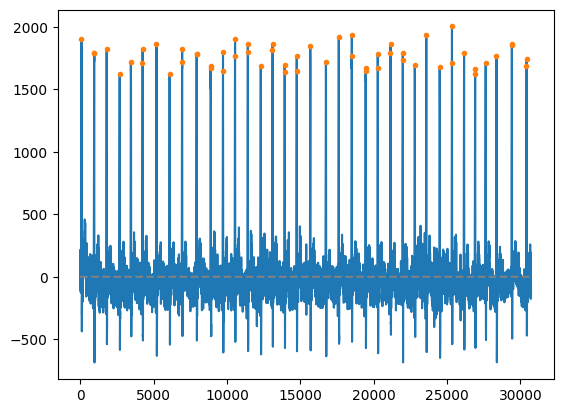

In [ ]:
y = filtered.flatten() #Flatten de la señal para pasarla a 1 dimensión
peaks, _ = find_peaks(y, height=1620) #Encontrar los picos con una altura superior a 1620

#Graficación
plt.plot(y)
plt.plot(peaks, y[peaks], ".") #Identificación grafica de los picos de la señal
plt.plot(np.zeros_like(x), "--", color="gray") #Eje 0
plt.show()

Varianza:  96684.31488232457
RMS:  319.62757818893766
Promedio:  74.00995782055861
Desviación estándar:  310.94101511753735


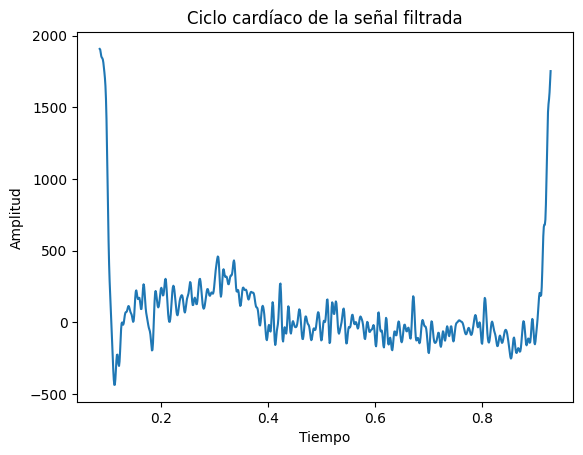

In [ ]:
#Selección de un ciclo de la señal filtrada en base a los picos encontrados
pico1 = peaks[0]
pico2 = peaks[1]
ciclo_f = y[pico1:pico2]
t_ciclo_f = tiempo[pico1:pico2]

#Graficación y cálculo de valores
plt.plot(t_ciclo_f,ciclo_f)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Ciclo cardíaco de la señal filtrada")
print("Varianza: ", np.var(ciclo_f))
print("RMS: ", rms(ciclo_f))
print("Promedio: ", np.mean(ciclo_f))
print("Desviación estándar: ", np.std(ciclo_f))

La señal filtrada presenta un valor de varianza significativo, lo que también indica una dispersión de los datos con respecto a la media de la señal, esto también se evidencia en el valor de la desviación estándar que indica una variabilidad en los datos de la señal.

Además, el promedio (aproximadamente 74) es más cercano a 0 a comparación de la señal sin filtrar, lo que indica el uso del filtrado para la señal.

**Comparación entre los resultados obtenidos (promedio, varianza, valor RMS y desviación estándar)**

**Señal filtrada:**

*   Varianza:  96684.31
*   RMS:  319.63
*   Promedio:  74.01
*   Desviación estándar:  310.94

**Señal sin filtrar:**

*   Varianza:  93646.22
*   RMS:  4142.45
*   Promedio:  4131.14
*   Desviación estándar:  306.02
  

Los cambios más significativos se evidencian en el valor RMS y el promedio. Este último se ve altamente afectado por la tendencia lineal que caracteriza a la señal sin filtrar, lo que produce que la amplitud de los datos sea mucho más alta de lo que en realidad es, y esta diferencia se hace más significativa conforme el tiempo avanza. Lo que consecuentemente afecta el valor RMS ya que mide la magnitud efectiva de la señal mediante la cuantificación del valor promedio de una variable, indicando el valor al cual tienden con mayor frecuencia las amplitudes durante gran parte del ciclo, la cual se redujo significativamente por el proceso de filtrado


Por otro lado, la varianza y la desviación estándar están directamente relacionadas entre sí y no se ven significativamente afectadas debido a que el detrending lineal influye directamente sobre la tendencia general de los datos, más no sobre las fluctuaciones alrededor de dicha tendencia. Lo que podría indicar que el proceso de filtrado conservó las características importantes de la señal sin eliminar componentes esenciales o introducir nuevas variaciones.

e) ***Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?***

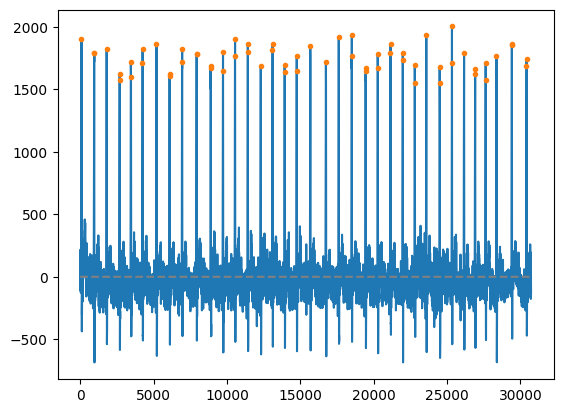

[   88   952   959  1806  2683  2693  3454  3464  4247  4256  5201  6090
  6096  6942  6950  7929  7936  8892  8901  9727  9733 10548 10554 11417
 11424 12304 13104 13111 13930 13938 14748 14756 15678 16743 17619 18501
 18508 19446 19453 20273 20279 21140 21148 21974 21981 22798 22804 23582
 24493 24502 25325 25331 26156 26903 26911 27619 27627 28365 29407 29413
 30406 30414]
[   88   952  1806  2683  3454  4247  5201  6090  6942  7929  8892  9727
 10548 11417 12304 13104 13930 14748 15678 16743 17619 18501 19446 20273
 21140 21974 22798 23582 24493 25325 26156 26903 27619 28365 29407 30406]
88
952
Varianza:  96684.31488232457
Promedio:  74.00995782055861


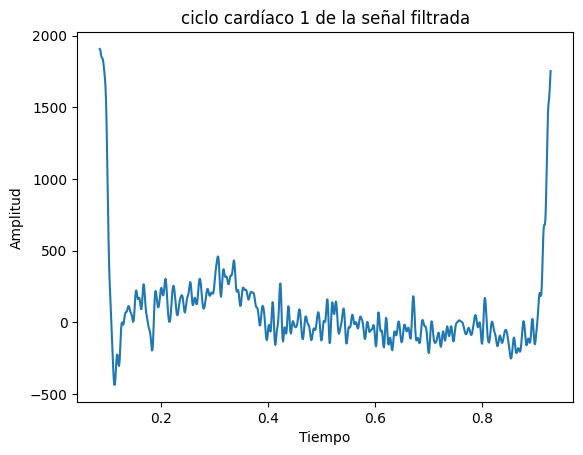

952
1806
Varianza:  104790.46548941819
Promedio:  -1.4625781779933433


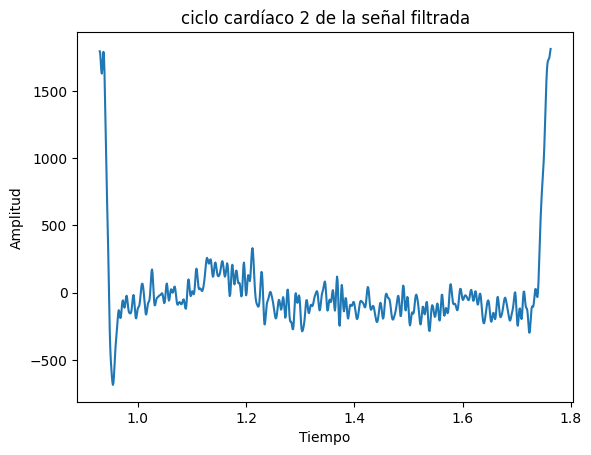

1806
2683
Varianza:  56555.25326369125
Promedio:  -27.8165204625197


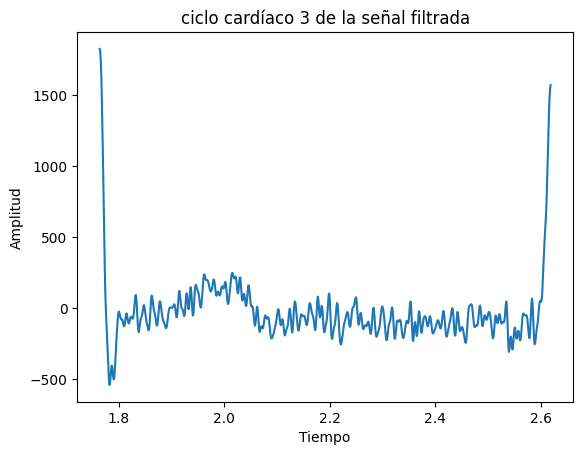

2683
3454
Varianza:  76435.39753403219
Promedio:  -1.064971744993113


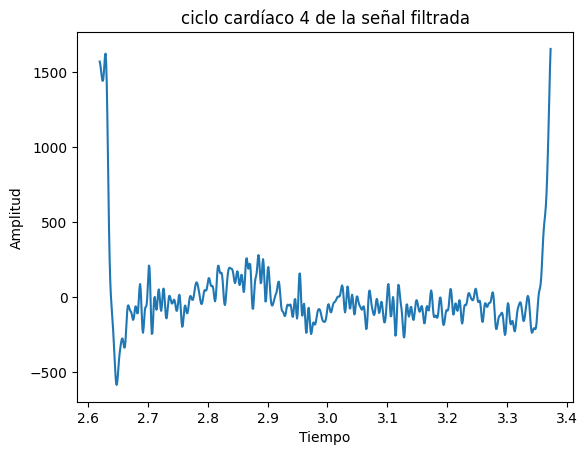

3454
4247
Varianza:  85305.73350400828
Promedio:  22.275921001828472


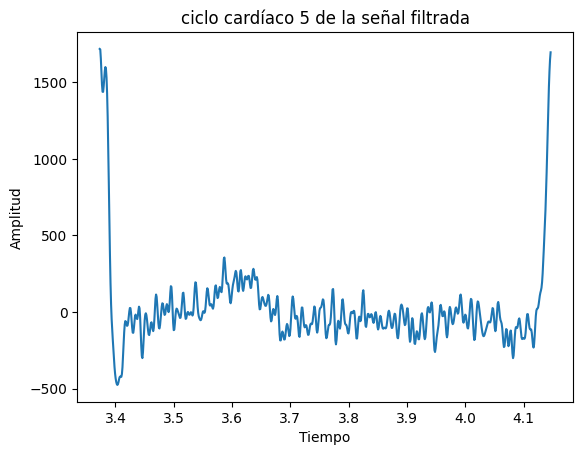

4247
5201
Varianza:  84866.00041141169
Promedio:  -11.837534752745318


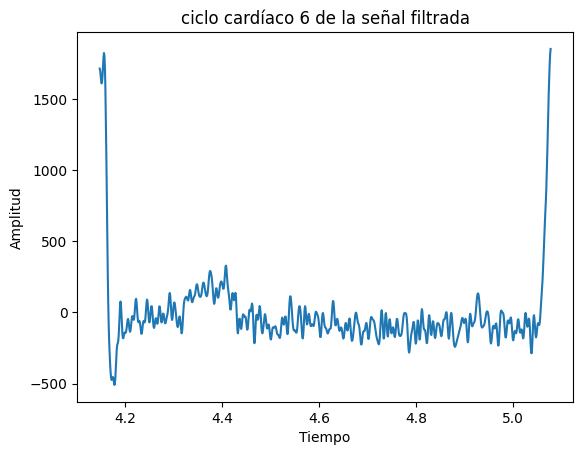

5201
6090
Varianza:  77707.28120177508
Promedio:  0.43078685936823324


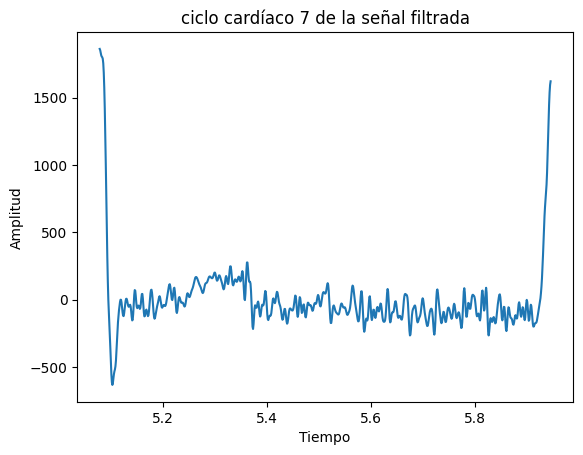

6090
6942
Varianza:  74040.59816426696
Promedio:  5.515211417309358


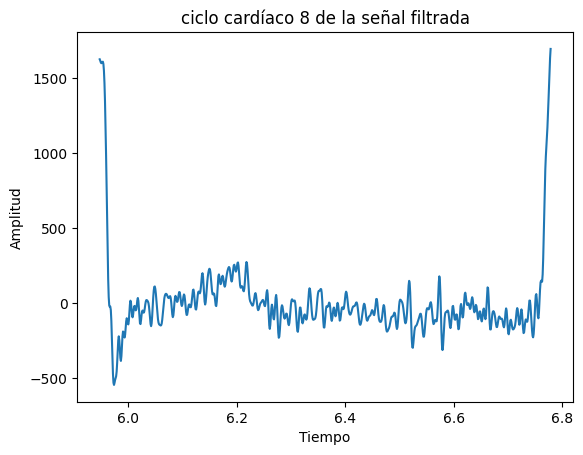

6942
7929
Varianza:  74286.87428547705
Promedio:  -8.555537442968186


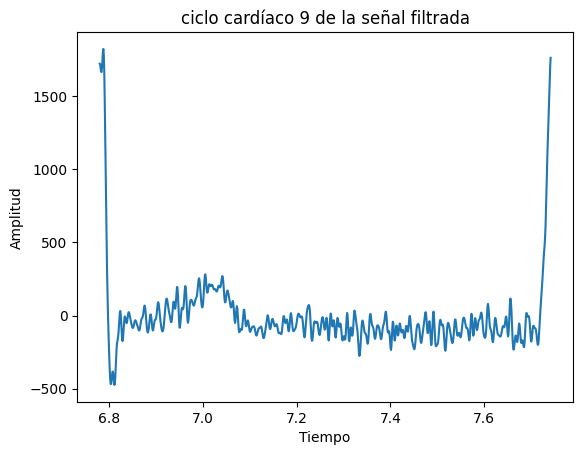

7929
8892
Varianza:  67264.69241771422
Promedio:  6.706483861784038


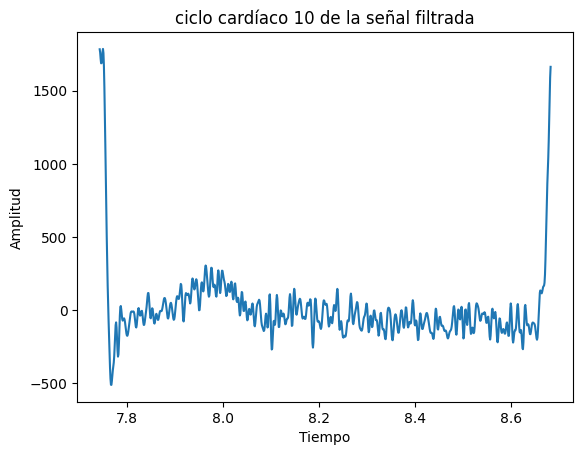

8892
9727
Varianza:  82112.22500135408
Promedio:  -4.045691039985618


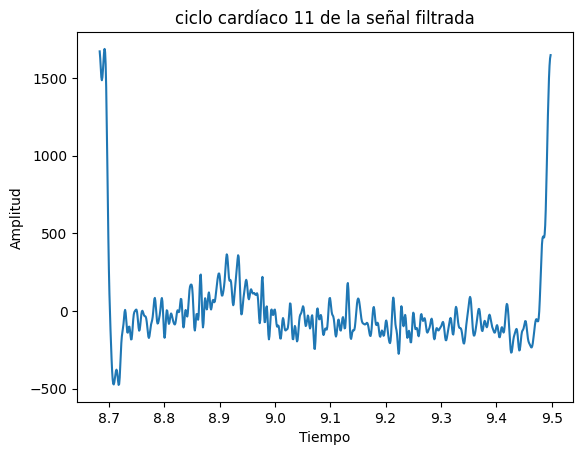

9727
10548
Varianza:  91702.93437808516
Promedio:  12.583483402095343


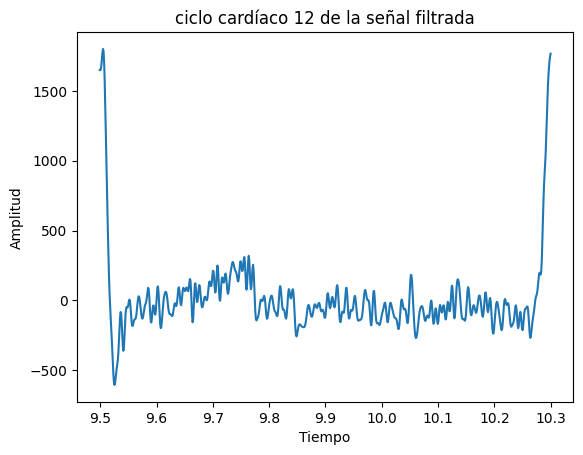

10548
11417
Varianza:  84685.52689405573
Promedio:  -6.17121898022013


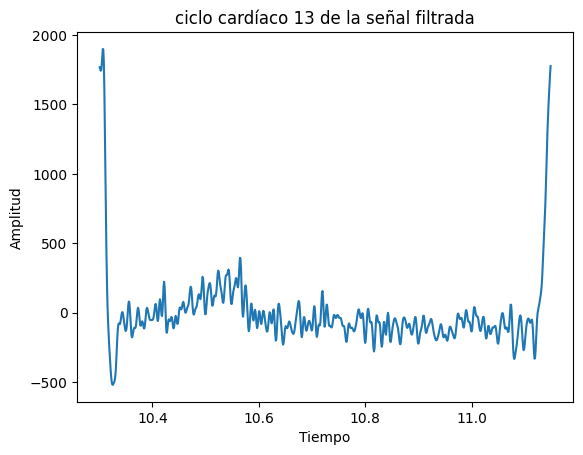

11417
12304
Varianza:  101251.21293741121
Promedio:  -0.9171143306123031


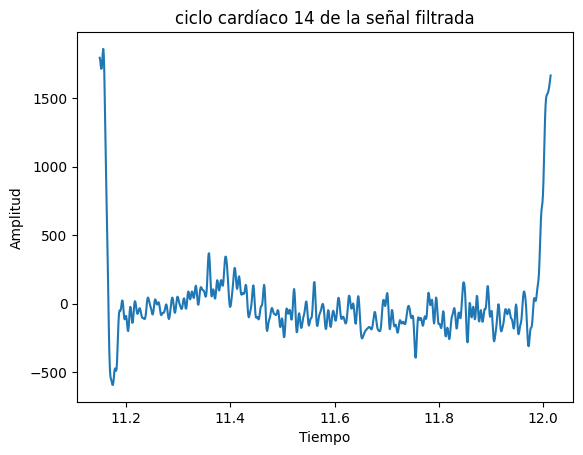

12304
13104
Varianza:  63632.94852978466
Promedio:  11.869783939427746


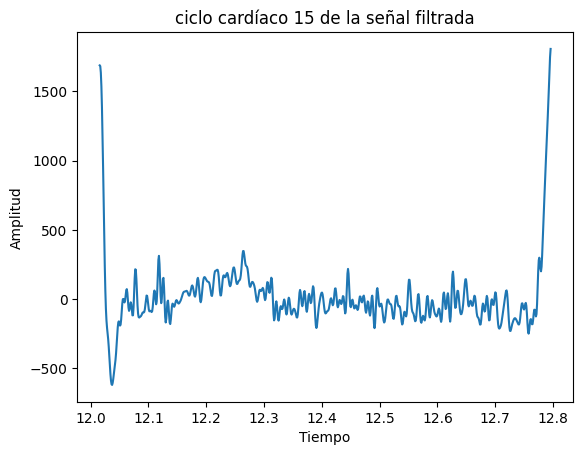

In [ ]:
y = filtered.flatten()
peaks, _ = find_peaks(y, height=1500) #Altura desde la cual se escogen los picos de la señal

#Graficación
plt.plot(y)
plt.plot(peaks, y[peaks], ".") #Identificación grafica de los picos de la señal
plt.plot(np.zeros_like(x), "--", color="gray") #Eje 0
plt.show()

print(peaks)

pico1 = peaks[0]
pico2 = peaks[1]

# Identificación de los picos a eliminar según la resta entre uno y el siguiente
ind_eliminar = [i+1 for i in range(len(peaks)-1) if peaks[i+1]-peaks[i]<100]

#Generación del nuevo vector de picos a emplear eliminando los picos identificados que no son eficentes
peaks_filt = np.delete(peaks,ind_eliminar)

print(peaks_filt)

#Graficación de los 15 ciclos de la señal
for i in range(15):
    pico_inicial = peaks_filt[i]
    pico_final = peaks_filt[i + 1]
    ciclovs = y[pico_inicial:pico_final] #Rango de amplitud del ciclo
    tiempo_ciclo = tiempo[pico_inicial:pico_final] #Tiempo del ciclo

    print(pico_inicial)
    print(pico_final)
    print("Varianza: ", np.var(ciclovs))
    print("Promedio: ", np.mean(ciclovs))

    plt.plot(tiempo_ciclo,ciclovs)
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.title(f"ciclo cardíaco {i+1} de la señal filtrada")
    plt.show()

Se evalúan 15 ciclos para analizar una parte significativa de la señal que permita evaluar sucomportamiento, en los cuales se observa:

Ciclos de una duración aproximada de 0.8 segundos, lo que va acorde con la duración media de un ciclo de la señal cardiaca, con valores máximos de amplitud que se encuentran entre 1500 y 2000 mV, y las fluctuaciones se dan alrededor de la media 0. Su diferencia principal radica en los valores de promedio y varianza, los cuales varían significativamente entre uno y otro, lo que es un indicador que la señal evaluada no es estacionaria, ya que no se pueden predecir valores futuros con certeza.

f) ***Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).***

`***COMPARACIÓN ENTRE CICLO 10 Y 11***`

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.6 MB/s eta 0:00:00


*Prueba de normalidad ciclo 10*

In [51]:
import pingouin as pg
statistic, p_value = stats.normaltest(y[peaks_filt[9]:peaks_filt[10]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[9]:peaks_filt[10]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.5493,3.907633e-44,False


*Prueba de normalidad ciclo 11*

In [50]:
statistic, p_value = stats.normaltest(y[peaks_filt[10]:peaks_filt[11]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[10]:peaks_filt[11]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.568435,4.097159e-41,False


*Homocedasticidad*


Dado que no se cumple el criterio de normalidad, se emplea el test de Levene.

In [49]:
Stat_levene, p_levene = levene(y[peaks_filt[9]:peaks_filt[10]],y[peaks_filt[10]:peaks_filt[11]])

if p_levene > 0.05:
  print('No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos ')
else:
  print('Se rechaza la hipostesis nula: La varianza difiere para los diferentes grupos')

No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos 


*Independencia*
Se asume que los grupos son independientes

No se puede realizar la prueba t ya que no se cumplen los tres requisitos (la prueba de normalidad dice que los datos no presentan una distribución normal). Por lo tanto se realiza la *Prueba U de Mann-Whitney*

In [48]:
stat, p_value = mannwhitneyu(y[peaks_filt[9]:peaks_filt[10]],y[peaks_filt[10]:peaks_filt[11]])

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


Haciendo uso de la prueba U de Mann-Whitney para el ciclo 10 y 11 se observa que la hipotesis nula se rechaza, lo que indica que hay diferencias significativas en los datos, por ejemplo en la amplitud de los ciclos y que este no sigue una periodicidad estrictamente constante.

`***COMPARACIÓN ENTRE CICLO 11 Y 12***`


*Prueba de normalidad ciclo 11*

In [47]:
statistic, p_value = stats.normaltest(y[peaks_filt[10]:peaks_filt[11]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[10]:peaks_filt[11]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.568435,4.097159e-41,False


*Prueba de normalidad ciclo 12*

In [46]:
statistic, p_value = stats.normaltest(y[peaks_filt[11]:peaks_filt[12]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[11]:peaks_filt[12]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.570161,8.816912e-41,False


*Homocedasticidad*


Dado que no se cumple el criterio de normalidad, se emplea el test de Levene.

In [43]:
Stat_levene, p_levene = levene(y[peaks_filt[10]:peaks_filt[11]],y[peaks_filt[11]:peaks_filt[12]])

if p_levene > 0.05:
  print('No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos ')
else:
  print('Se rechaza la hipostesis nula: La varianza difiere para los diferentes grupos')

No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos 


*Independencia*

Se asume que los grupos son independientes

No se puede realizar la prueba t ya que no se cumplen los tres requisitos (la prueba de normalidad dice que los datos no presentan una distribución normal). Por lo tanto se realiza la *Prueba U de Mann-Whitney*

In [44]:
stat, p_value = mannwhitneyu(y[peaks_filt[10]:peaks_filt[11]],y[peaks_filt[11]:peaks_filt[12]])

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


Haciendo uso de la prueba U de Mann-Whitney para el ciclo 11 y 12 se observa que la hipotesis nula se rechaza, lo que indica que hay diferencias significativas en los datos, por ejemplo en la amplitud de los ciclos y que este no sigue una periodicidad estrictamente constante.

Con esto se pude establecer que la señal no presenta estacionaridad

g) ***Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad)***

In [71]:
from statsmodels.tsa.stattools import adfuller

#Dickey-Fuller Aumentada
resultado = adfuller(filtered.flatten())

#Resultado
alpha = 0.05
if resultado[1] < alpha:
    print("Se rechaza la hipótesis nula: la serie es estacionaria.")
else:
    print("No se rechaza la hipótesis nula: la serie no es estacionaria.")

Se rechaza la hipótesis nula: la serie es estacionaria.


In [70]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

alpha = 0.05
resultados_adf = []

# Recorremos 10 ciclos de la señal
for i in range(10):
    pico_inicial = peaks_filt[i]
    pico_final = peaks_filt[i + 1]
    ciclo = y[pico_inicial:pico_final]  # subserie = ciclo cardíaco

    try:
        adf_stat, pvalue, *_ = adfuller(ciclo)

        if pvalue < alpha:
            conclusion = "Estacionaria"
        else:
            conclusion = "No estacionaria"

        resultados_adf.append([i+1, pvalue, conclusion])

        print(f"Ciclo {i+1}: p-valor={pvalue:.4f} → {conclusion}")

    except Exception as e:
        resultados_adf.append([i+1, None, f"Error: {e}"])
        print(f"Ciclo {i+1}: Error → {e}")

# Pasamos a DataFrame para organizar mejor
df_adf = pd.DataFrame(resultados_adf, columns=[
    "Ciclo", "p-valor", "Conclusión"
])


Ciclo 1: p-valor=0.1756 → No estacionaria
Ciclo 2: p-valor=0.1999 → No estacionaria
Ciclo 3: p-valor=0.1299 → No estacionaria
Ciclo 4: p-valor=0.2600 → No estacionaria
Ciclo 5: p-valor=0.2465 → No estacionaria
Ciclo 6: p-valor=0.0820 → No estacionaria
Ciclo 7: p-valor=0.3334 → No estacionaria
Ciclo 8: p-valor=0.1608 → No estacionaria
Ciclo 9: p-valor=0.1781 → No estacionaria
Ciclo 10: p-valor=0.0791 → No estacionaria


Las señales ECG suelen ser no estacionarias porque sus características cambian con el tiempo, ya que cada latido no es exactamente igual al anterior y la variabilidad fisiológica modifica la media y la varianza. Al analizar la señal completa, el patrón repetitivo de los latidos hace que parezca estacionaria en conjunto, pero al evaluar cada ciclo de forma individual se evidencian esas variaciones naturales, lo que confirma que en realidad no es completamente estacionaria.